In [128]:
import numpy as np
import numpy.random as rd
import scipy.stats as st
from scipy.integrate import quad
import pandas as pd
from tabulate import tabulate

import math

import copy, sys
from collections import Counter

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation as ani
import seaborn as sns
sns.set(style="whitegrid", palette="muted", color_codes=True)

In [151]:
class Metropolis():
    def __init__(self,  func, n_itr = 100000, init = 1, prop_m = 1, prop_sd = 0.5):
        self.func = func
        self.n_itr = n_itr
        self.init = init
        
        self.prop_m  = prop_m
        self.prop_sd = prop_sd
    
    def _q(self, x):
        return st.norm.pdf(x, loc=self.prop_m, scale=self.prop_sd)

    def _rand_prop(self):
        return st.norm.rvs(self.prop_m, self.prop_sd)
    
    def sampling(self):
        sample = []
        current = self.init
        sample.append(current)

        for i in range(self.n_itr):
            # 提案分布からの乱数生成
            a = self._rand_prop()
            if a < 0:
                sample.append(sample[-1])
                continue

            r = (self._q(current)*self.func(a)) / (self._q(a)*self.func(current))
            #assert r > 0

            if r < 0:
                #reject
                sample.append(sample[-1])
            elif 1 < r or r > st.uniform.rvs():
                # Accept
                sample.append(a)
                current = a
            else:
                #reject
                sample.append(sample[-1])
                
        return sample

(0, 4)

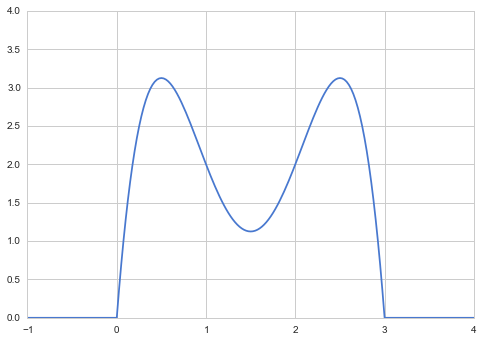

In [152]:
def target_dist(x):
    if x < 0 or 3 < x:
        return 0
    else:
        return -2*(x-2.5)**4 - 8*(x-2.5)**3 - 8*(x-2.5)**2 + 3.125

area, abserr = quad(target_dist, 0, 3)
    
xx = np.linspace(-1,4, 201)
plt.plot(xx, map(target_dist, xx))
plt.ylim(0, 4)

In [153]:
n_itr = 500000
mtp = Metropolis(target_dist, init=2, n_itr=n_itr)
result = mtp.sampling()


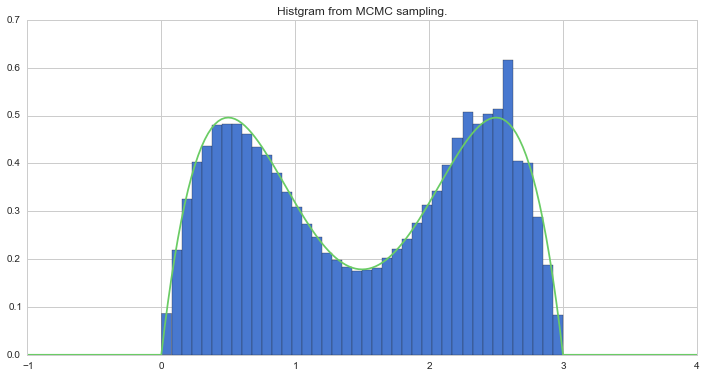

In [154]:
n_burn_in = 1000
n_bins = 40
plt.figure(figsize=(12,6))
plt.title("Histgram from MCMC sampling.")
plt.hist(result[n_burn_in:], bins=n_bins, normed=True)

xx = np.linspace(-1, 4, 201)
plt.plot(xx, np.array(map(target_dist, xx))/area)

plt.show()